In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [23]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame= True)

df = data.frame

In [24]:
# Split into features and target

X = df.drop('MedHouseVal', axis = 1 ) # Features
y = df['MedHouseVal']                  # Target

In [25]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Train Random Forest Regressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Get feature importance

feature_importance = rf_model.feature_importances_

In [28]:
# Create DataFrame for visualization

importance_df = pd.DataFrame({'Feature':X.columns, 'Importance' : feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature  Importance
0      MedInc    0.526032
5    AveOccup    0.138292
7   Longitude    0.086134
6    Latitude    0.086096
1    HouseAge    0.054690
2    AveRooms    0.047040
4  Population    0.031734
3   AveBedrms    0.029983


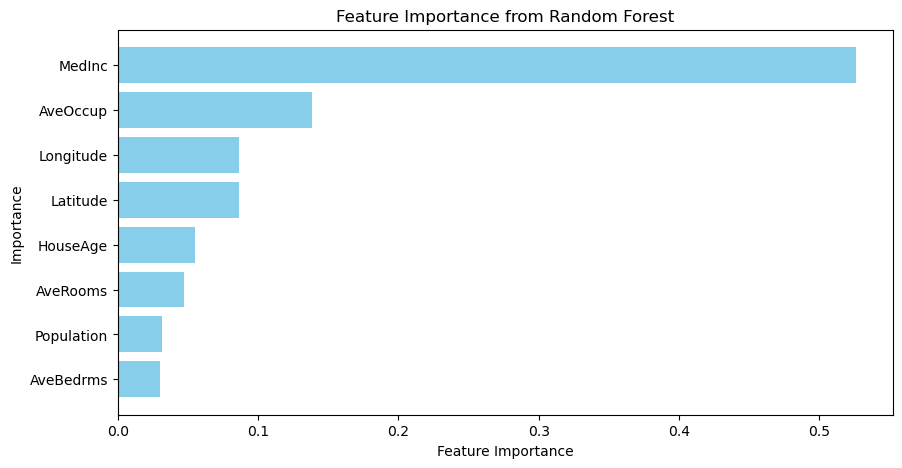

In [29]:
# Plot feature importance - Visualization

plt.figure(figsize=(10,5))

plt.barh(importance_df['Feature'], importance_df['Importance'], color = 'skyblue')

plt.xlabel('Feature Importance')

plt.ylabel('Importance')

plt.title('Feature Importance from Random Forest')

plt.gca().invert_yaxis() # Reverse the order for better readability

plt.show()

In [30]:
#  Train a Regression Model with Selected Features

# Select top 3 features

selected_features = importance_df['Feature'][:3].tolist()

In [31]:
# Train-test split with selected features

X_train_selected = X_train[selected_features]

X_test_selected = X_test[selected_features]

In [32]:
# Train regression model

lr = LinearRegression()

lr.fit(X_train_selected, y_train)

LinearRegression()

In [34]:
# Predictions and MSE

y_pred = lr.predict(X_test_selected)

mse_rf_features = mean_squared_error(y_test, y_pred)

print(f" Mean Squared Error (Selected features from Random Forest): {mse_rf_features}")

 Mean Squared Error (Selected features from Random Forest): 0.6889746485720031
